In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
cpp_data = pd.read_csv("cpp_result.csv")
py_data = pd.read_csv("python_result.csv")

In [3]:
cpp_data.head()

,Backend,Model,NumThreads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,ONNX,s,-1,198,15.5,14.0000,12.75,12.8,13.1667,12.0000,11.875,12.0000,11.8,12.2727,11.9167,12.0000,11.7143,11.8667,11.7500
1,ONNX,m,-1,196,20.0,17.6667,18.00,17.4,16.5000,17.1429,16.875,16.3333,16.9,16.3636,18.5000,18.5385,17.2857,17.0667,17.0000
2,ONNX,b,-1,229,25.0,23.6667,22.50,21.6,22.1667,21.7143,21.375,21.6667,21.1,21.6364,21.0000,21.0000,21.0000,20.8667,22.0000
3,ONNX,l,-1,217,30.5,27.0000,23.50,22.6,23.5000,22.5714,22.375,22.4444,22.5,23.0000,22.4167,22.3846,22.1429,21.9333,21.6875
4,ONNX,s,1,222,16.0,18.3333,13.25,13.2,13.5000,13.1429,13.000,12.6667,12.8,12.8182,12.5833,12.7692,12.5000,12.8667,12.5625


In [4]:
cpp_trt = cpp_data[cpp_data["Backend"] == "TRT"]
py_trt = py_data[py_data["Backend"] == "TRT"]

In [5]:
cpp_trt

,Backend,Model,NumThreads,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
20,TRT,s,-1,58,21.0,15.6667,13.50,11.8,11.3333,12.4286,11.750,11.7778,11.0,11.1818,10.8333,10.3846,10.4286,10.0667,11.5625
21,TRT,m,-1,61,25.0,19.6667,16.75,15.4,14.5000,15.7143,14.750,14.6667,14.3,15.9091,15.7500,15.6923,15.5000,15.3333,15.3125
22,TRT,b,-1,75,25.5,21.3333,18.75,17.2,16.8333,17.5714,17.125,16.7778,16.6,18.2727,18.3333,18.2308,17.7143,17.8000,17.6250
23,TRT,l,-1,69,28.0,23.6667,21.00,19.4,18.8333,19.7143,18.750,18.8889,18.1,20.3636,20.1667,19.7692,19.5714,19.7333,19.6875


In [6]:
cpp_data.columns

Index(['Backend', 'Model', 'NumThreads', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', '10', '11', '12', '13', '14', '15', '16'],
      dtype='object')

In [26]:
cpp_models = cpp_trt["Model"]
cpp = cpp_trt.drop(["Backend", "Model", "NumThreads"], axis=1)

In [27]:
py_models = py_trt["Model"]
py = py_trt.drop(["Backend", "Model", "NumThreads"], axis=1)

In [28]:
cpp = cpp.to_numpy()
py = py.to_numpy()

cpp.shape

(4, 16)

In [ ]:
list(range(1, len(cpp[0])+1))

[1, 2, 3, 4]

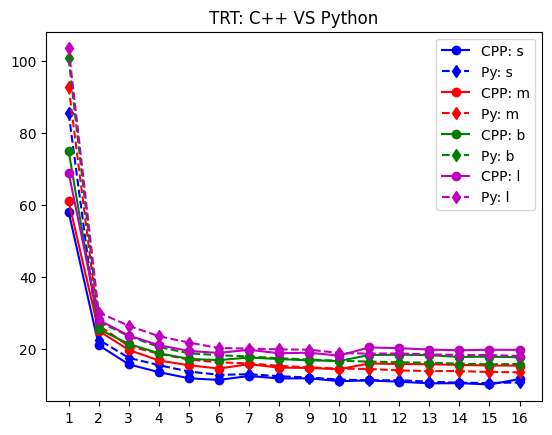

In [49]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, cpp.shape[1]+1))
for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, cpp[j], f"{c}-o", label=f"CPP: {lbl}")
    plt.plot(ticks, py[j], f"{c}--d", label=f"Py: {lbl}")

plt.legend()
plt.title("TRT: C++ VS Python")
plt.xticks(ticks)

plt.show()

In [53]:
cpp_trt = cpp_data[cpp_data["Backend"] == "TRT"]
cpp_onnx = cpp_data[(cpp_data["Backend"] == "ONNX") & (cpp_data["NumThreads"] == -1)]

In [54]:
cpp_trt = cpp_trt.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
cpp_onnx = cpp_onnx.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
cpp_trt.shape, cpp_onnx.shape

((4, 16), (4, 16))

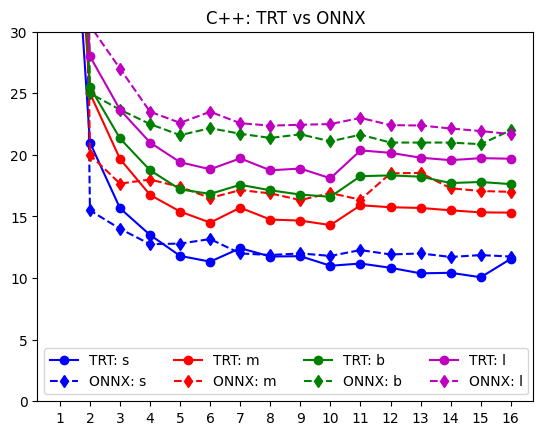

In [62]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, cpp.shape[1]+1))

for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, cpp_trt[j], f"{c}-o", label=f"TRT: {lbl}")
    plt.plot(ticks, cpp_onnx[j], f"{c}--d", label=f"ONNX: {lbl}")

plt.legend(ncols=4)
plt.title("C++: TRT vs ONNX")
plt.xticks(ticks)

plt.ylim(0, 30)
plt.show()

In [58]:
py_trt = py_data[py_data["Backend"] == "TRT"]
py_onnx = py_data[(py_data["Backend"] == "ONNX") & (py_data["NumThreads"] == -1)]

In [59]:
py_trt = py_trt.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_onnx = py_onnx.drop(["Backend", "Model", "NumThreads"], axis=1).to_numpy()
py_trt.shape, py_onnx.shape

((4, 16), (4, 16))

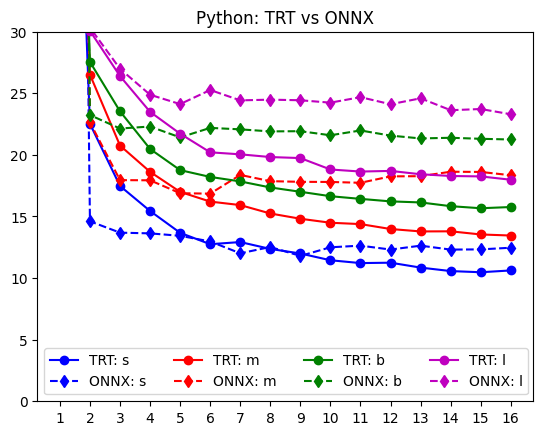

In [61]:
colors = ["b", "r", "g", "m"]
labels = ["s", "m", "b", "l"]
ticks = list(range(1, py_trt.shape[1]+1))

for j, (c, lbl) in enumerate(zip(colors, labels)):
    plt.plot(ticks, py_trt[j], f"{c}-o", label=f"TRT: {lbl}")
    plt.plot(ticks, py_onnx[j], f"{c}--d", label=f"ONNX: {lbl}")

plt.legend(ncols=4)
plt.title("Python: TRT vs ONNX")
plt.xticks(ticks)

plt.ylim(0, 30)
plt.show()